In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'] , mnist['target']
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

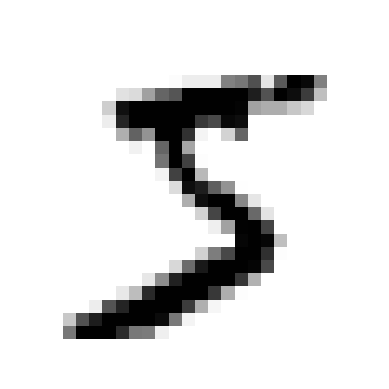

In [4]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

some_digit = X.iloc[0].values  # Access the first row and convert to a NumPy array

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
y[0]

'5'

In [6]:
y = y.astype(int)

In [7]:
X_train, X_test = X[:60000], X[60000:] 
y_train, y_test = y [:60000], y[60000:]

# Training a Binary Classifier
let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
this classification task:

In [8]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test == 5)

Now let’s pick a classifier and train it. A good place to start is with a Stochastic Gradi‐
ent Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier
has the advantage of being capable of handling very large datasets efficiently. This is
in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning), as we will see later. Let’s cre‐
ate an SGDClassifier and train it on the whole training set

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=47)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=47)

In [10]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we
will spend a large part of this chapter on this topic. There are many performance
measures available

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88335, 0.8642 , 0.8838 ])

accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets

# Confusion matrix

A much better way to evaluate the performance of a classifier is to look at the confu‐
sion matrix. The general idea is to count the number of times instances of class A are
classified as class B. 

To compute the confusion matrix, you first need to have a set of predictions so that
they can be compared to the actual targets. You could make predictions on the test
set, but let’s keep it untouched for now (remember that you want to use the test set
only at the very end of your project, once you have a classifier that you are ready to
launch). Instead, you can use the cross_val_predict() function

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict() performs K-fold
cross-validation, but instead of returning the evaluation scores, it returns the predic‐
tions made on each test fold. This means that you get a clean prediction for each
instance in the training set (“clean” meaning that the prediction is made by a model
that never saw the data during training)

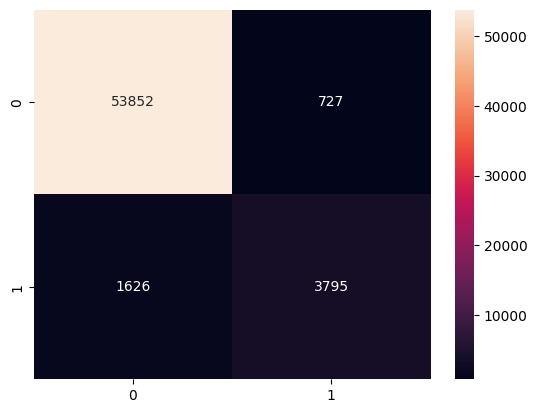

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)

sns.heatmap(cm, annot=True, fmt=".0f")
plt.show()

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

The first row of this matrix considers non-5 images (the negative class): 53,057 of them were correctly classified as non-5s (they are called truenegatives).

While the remaining 1,522 were wrongly classified as 5s (false positives).

The second row considers the images of 5s (the positive class): 1,325 were wrongly classified as non-5s (false negatives).

While the remaining 4,096 were correctly classified as 5s (true positives).

The confusion matrix gives you a lot of information, but sometimes you may prefer a
more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier

# Precision

equation of Precision = TP / TP + FP

TP is the number of true positives, and FP is the number of false positives.
A trivial way to have perfect precision is to make one single positive prediction and
ensure it is correct (precision = 1/1 = 100%). But this would not be very useful, since
the classifier would ignore all but one positive instance. So precision is typically used
along with another metric named recall, also called sensitivity or the true positive rate
(TPR): this is the ratio of positive instances that are correctly detected by the classifier

# Recall

equation of recall = TP / TP + FN

In [18]:
from sklearn.metrics import precision_score , recall_score
print("Precision: ",precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.8392304290137107
Recall:  0.7000553403431101


Now your 5-detector does not look as shiny as it did when you looked at its accuracy.

When it claims an image represents a 5, it is correct only 83.9% of the time. Moreover, it only detects 70% of the 5s.

# F1 Score

It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers. The F1 score is
the harmonic mean of precision and recall (Equation 3-3). Whereas the regular mean
treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1 score if both recall and precision are
high.

In [19]:
from sklearn.metrics import f1_score

print("f1 score:", f1_score(y_train_5, y_train_pred))

f1 score: 0.7633511012772803


# Precision/Recall Trade off

The precision-recall tradeoff refers to the balance between being accurate (precision) and capturing all relevant instances (recall).

    Precision: Focuses on how many of your positive predictions are actually correct. (Higher precision = fewer false positives.)
    Recall: Focuses on how many of the actual positives you correctly identified. (Higher recall = fewer false negatives.)

When you increase one, the other may decrease:

    If you try to increase precision, you may miss some true positives, lowering recall.
    If you try to increase recall, you may include more false positives, lowering precision.

The tradeoff depends on what’s more important in your problem—accuracy or completeness. For example:

    High precision: Useful in spam detection (avoid marking important emails as spam).
    High recall: Useful in disease detection (catch all possible cases).



Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions.
Instead of calling the classifier’s
predict() method, you can call its decision_function()

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([1909.08072371])

In [23]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0, so the previous code returns the same
result as the predict() method (i.e., True). Let’s raise the threshold:

In [24]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually repre‐
sents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 8,000.

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

With these scores, use the precision_recall_curve() function to compute precision
and recall for all possible thresholds

In [31]:
from sklearn.metrics import precision_recall_curve
precisions, recalls,  thresholds = precision_recall_curve(y_train_5, y_scores) 

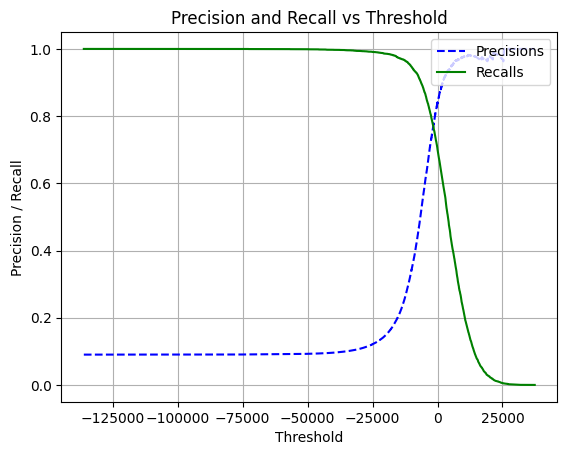

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label='Precisions')
    plt.plot(thresholds, recalls[:-1], "g-", label='Recalls')
    plt.legend(loc="upper right")
    plt.xlabel("Threshold")
    plt.ylabel("Precision / Recall")
    plt.title("Precision and Recall vs Threshold")
    plt.grid(True)
    plt.show()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

    

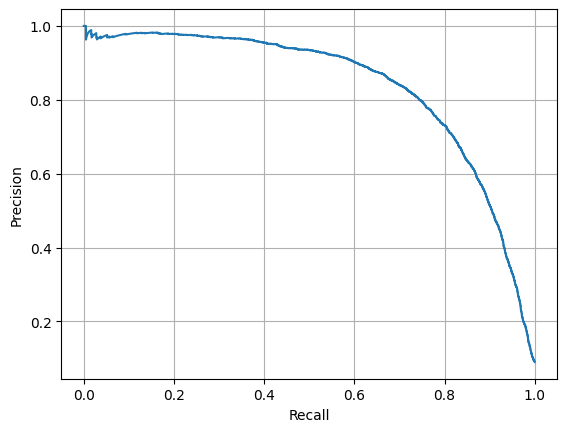

In [39]:
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel("Precision")
plt.grid(True)
plt.show()

You can see that precision really starts to fall sharply around 80% recall. You will
probably want to select a precision/recall trade-off just before that drop—for exam‐
ple, at around 60% recall. But of course, the choice depends on your project.
Suppose you decide to aim for 90% precision. You look up the first plot and find that
you need to use a threshold of about 8,000. To be more precise you can search for the
lowest threshold that gives you at least 90% precision

In [44]:
import numpy as np
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [45]:
print(f"Precisions: {precision_score(y_train_5, y_train_pred_90)}")
print(f"Recall: {recall_score(y_train_5, y_train_pred_90)}")

Precisions: 0.9000273897562312
Recall: 0.6061612248662608


Great, you have a 90% precision classifier! As you can see, it is fairly easy to create a
classifier with virtually any precision you want: just set a high enough threshold, and
you’re done. But wait, not so fast. A high-precision classifier is not very useful if its
recall is too low!

# ROC curve

The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate (FPR). 

In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

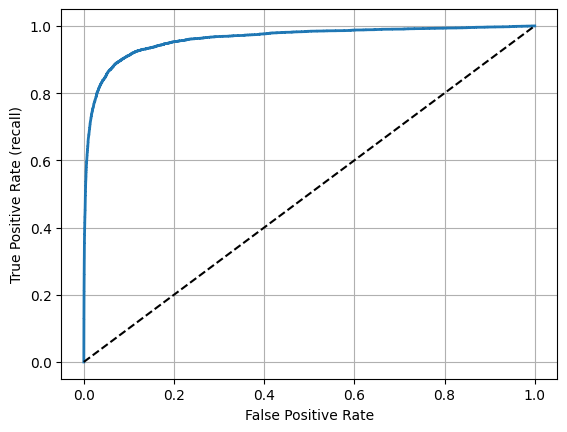

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr,linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.ylabel("True Positive Rate (recall)")
    plt.grid(True)
    plt.xlabel("False Positive Rate")

plot_roc_curve(fpr, tpr)

One way to compare classifiers is to measure the area under the curve (AUC). A per‐
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC
AUC:

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9621458763630213

Let’s now train a RandomForestClassifier and compare its ROC curve and ROC
AUC score to those of the SGDClassifier. 

But due to the way it works|, the Random
ForestClassifier class does not have a decision_function() method. Instead, it
 Classification
has a predict_proba() method

In [52]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=47)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

The roc_curve() function expects labels and scores, but instead of scores you can
give it class probabilities. Let’s use the positive class’s probability as the score

In [53]:
y_scores_forest = y_probas_forest[:,1]

f_fpr, f_tpr, threshold = roc_curve(y_train_5, y_scores_forest)

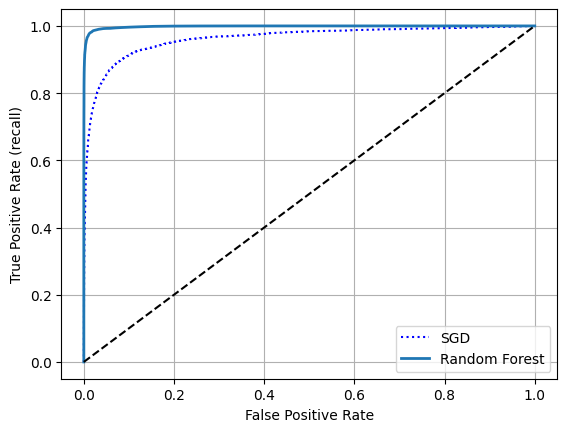

In [56]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(f_fpr, f_tpr, label="Random Forest")
plt.legend(loc="lower right")
plt.show()

As you can see in Figure, the RandomForestClassifier’s ROC curve looks much
better than the SGDClassifier’s: it comes much closer to the top-left corner. As a
result, its ROC AUC score is also significantly better:

In [74]:
print(f"ROC AUC SCORE: {roc_auc_score(y_train_5, y_scores_forest)}")
threshold = 0.5
y_pred_forest = (y_scores_forest >= threshold).astype(int)
print(f"Precision: {precision_score(y_train_5, y_pred_forest)}")
print(f"Recall: {recall_score(y_train_5, y_pred_forest)}")

ROC AUC SCORE: 0.9983226319933023
Precision: 0.9893372360443237
Recall: 0.8729016786570744


You now know how to train binary classifiers, choose the appropriate metric for your
task, evaluate your classifiers using cross-validation, select the precision/recall trade-
off that fits your needs, and use ROC curves and ROC AUC scores to compare vari‐
ous models. Now let’s try to detect more than just the 5s